#What Makes a Game on Steam Popular?

A look at data from Nik Davis https://www.kaggle.com/nikdavis/steam-store-games

In [1]:
import pandas as pd

df = pd.read_csv('data/steam.csv')

In [2]:
#take a look at the data
df.head()

appid                       name release_date  english         developer  \
0     10             Counter-Strike   2000-11-01        1             Valve   
1     20      Team Fortress Classic   1999-04-01        1             Valve   
2     30              Day of Defeat   2003-05-01        1             Valve   
3     40         Deathmatch Classic   2001-06-01        1             Valve   
4     50  Half-Life: Opposing Force   1999-11-01        1  Gearbox Software   

  publisher          platforms  required_age  \
0     Valve  windows;mac;linux             0   
1     Valve  windows;mac;linux             0   
2     Valve  windows;mac;linux             0   
3     Valve  windows;mac;linux             0   
4     Valve  windows;mac;linux             0   

                                          categories  genres  \
0  Multi-player;Online Multi-Player;Local Multi-P...  Action   
1  Multi-player;Online Multi-Player;Local Multi-P...  Action   
2              Multi-player;Valve Anti-Cheat enabled  Action   
3  Multi-player;Online Multi-Player;Local Multi-P...  Action   
4  Single-player;Multi-player;Valve Anti-Cheat en...  Action   

                  steamspy_tags  achievements  positive_ratings  \
0        Action;FPS;Multiplayer             0            124534   
1        Action;FPS;Multiplayer             0              3318   
2  FPS;World War II;Multiplayer             0              3416   
3        Action;FPS;Multiplayer             0              1273   
4             FPS;Action;Sci-fi             0              5250   

   negative_ratings  average_playtime  median_playtime             owners  \
0              3339             17612              317  10000000-20000000   
1               633               277               62   5000000-10000000   
2               398               187               34   5000000-10000000   
3               267               258              184   5000000-10000000   
4               288               624              415   5000000-10000000   

   price  
0   7.19  
1   3.99  
2   3.99  
3   3.99  
4   3.99

In [3]:
df.columns

Index(['appid', 'name', 'release_date', 'english', 'developer', 'publisher',
       'platforms', 'required_age', 'categories', 'genres', 'steamspy_tags',
       'achievements', 'positive_ratings', 'negative_ratings',
       'average_playtime', 'median_playtime', 'owners', 'price'],
      dtype='object')

In [4]:
df['publisher'].nunique()

14354

In [5]:
df['developer'].nunique()

17113

In [6]:
release_d = pd.to_datetime(df['release_date'], infer_datetime_format=True)

In [7]:
#change datetimes to age in days for use in models
import datetime as dt
scrape_date = pd.to_datetime('06/01/2019')
scrape_date

age_in_days = scrape_date - release_d
df['age_in_days'] = age_in_days.dt.days
df['age_in_days']

0        6786
1        7366
2        5875
3        6574
4        7152
         ... 
27070      38
27071      39
27072      38
27073      45
27074      38
Name: age_in_days, Length: 27075, dtype: int64

In [8]:
#ordinalize target categories
target_ranked = df['owners'].replace({'0-20000':0, '20000-50000':1, 
                                  '50000-100000':2, '100000-200000':3, 
                                  '200000-500000':4,'500000-1000000':5,
                                  '1000000-2000000':6,'2000000-5000000':7,
                                  '5000000-10000000':8,'10000000-20000000':9,
                                  '20000000-50000000':10,'50000000-100000000':11,
                                  '100000000-200000000':12})
target_ranked.value_counts(normalize=True)

0     0.686833
1     0.112982
2     0.062604
3     0.051191
4     0.046981
5     0.018947
6     0.010637
7     0.007128
8     0.001699
9     0.000776
10    0.000111
11    0.000074
12    0.000037
Name: owners, dtype: float64

In [9]:
target = 'owners'
features = ['developer', 'publisher', 'english', 'required_age', 'achievements', 'positive_ratings', 'negative_ratings',
       'average_playtime', 'median_playtime', 'price', 'genres', 'platforms', 'age_in_days']
#to be cleaned later 'release_date' *done* 
# features that should be dropped include:
# 'appid', 'name', 'categories' and 'steamspy_tags' (as they're nearly the same as 'genre')
# need to encode genre tags so values are separated

# thankfully, it looks like with the target I've selected there will be no time-travelling in my model

In [10]:
#find a baseline, majority class is 68.6%
df[target].value_counts(normalize=True)

0-20000                0.686833
20000-50000            0.112982
50000-100000           0.062604
100000-200000          0.051191
200000-500000          0.046981
500000-1000000         0.018947
1000000-2000000        0.010637
2000000-5000000        0.007128
5000000-10000000       0.001699
10000000-20000000      0.000776
20000000-50000000      0.000111
50000000-100000000     0.000074
100000000-200000000    0.000037
Name: owners, dtype: float64

In [11]:
df[target] = target_ranked

In [18]:
#visualize target distribution
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,12))
sns.distplot(target_ranked);

plt.rcParams['figure.dpi'] = 72

ModuleNotFoundError: No module named 'matplotlib.artist'

In [15]:
plt.xticks(np.arange(13),('0-20000', '20000-50000','50000-100000',
               '100000-200000','200000-500000','500000-1000000',
               '1000000-2000000','2000000-5000000',
               '5000000-10000000','10000000-20000000',
               '20000000-50000000','50000000-100000000',
               '100000000-200000000'), rotation=-30)
plt.xlabel('Total Owners')
plt.ylabel('Number of Total Owners in Category')
plt.title('Steam Game Ownership')
# plt.figure(figsize=(20,20))
# plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.xlim(0, 13)
#plt.ylim(0, 0.03)
plt.grid(False)
target_ranked.hist(bins=np.arange(13))
plt.show()

NameError: name 'plt' is not defined

In [243]:
trvc = target_ranked.value_counts()
xt = ['0-20000', '20000-50000','50000-100000',
               '100000-200000','200000-500000','500000-1000000',
               '1000000-2000000','2000000-5000000',
               '5000000-10000000','10000000-20000000',
               '20000000-50000000','50000000-100000000',
               '100000000-200000000']
testt = pd.Series(data=trvc.values, index=xt)
testt

0-20000                18596
20000-50000             3059
50000-100000            1695
100000-200000           1386
200000-500000           1272
500000-1000000           513
1000000-2000000          288
2000000-5000000          193
5000000-10000000          46
10000000-20000000         21
20000000-50000000          3
50000000-100000000         2
100000000-200000000        1
dtype: int64

In [249]:
testt

0-20000                18596
20000-50000             3059
50000-100000            1695
100000-200000           1386
200000-500000           1272
500000-1000000           513
1000000-2000000          288
2000000-5000000          193
5000000-10000000          46
10000000-20000000         21
20000000-50000000          3
50000000-100000000         2
100000000-200000000        1
dtype: int64

TypeError: unsupported operand type(s) for +: 'int' and 'str'

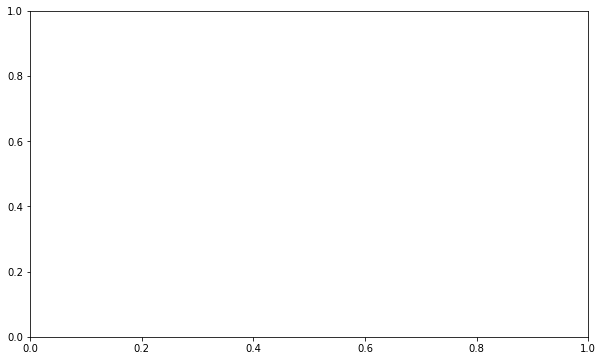

In [247]:

fig = plt.figure(figsize=(10,6))
plt.bar(testt.index, testt)
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Percent Owned by Steam Users')

for x,y in zip(testt.index, testt):
  plt.annotate("{:.1f}%".format(y),(x,y), horizontalalignment='center')

plt.show()

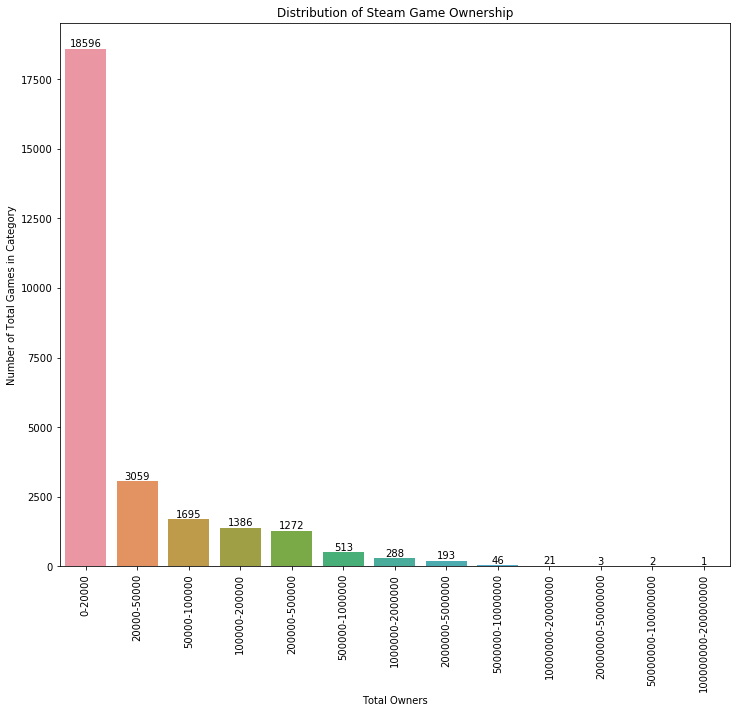

In [280]:
fig, ax = plt.subplots()
ax = sns.barplot(x=testt.index, y=testt, data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
fig.set_size_inches(12, 10)
plt.xlabel('Total Owners')
plt.ylabel('Number of Total Games in Category')
plt.title('Distribution of Steam Game Ownership')

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

ValueError: shape mismatch: objects cannot be broadcast to a single shape

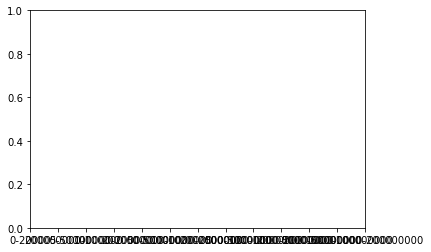

In [178]:
import numpy as np
x = np.arange(13)

plt.xticks(x, ('0-20000', '20000-50000','50000-100000',
               '100000-200000','200000-500000','500000-1000000',
               '1000000-2000000','2000000-5000000',
               '5000000-10000000','10000000-20000000',
               '20000000-50000000','50000000-100000000',
               '100000000-200000000'))
plt.bar(x, target_ranked)
plt.show()

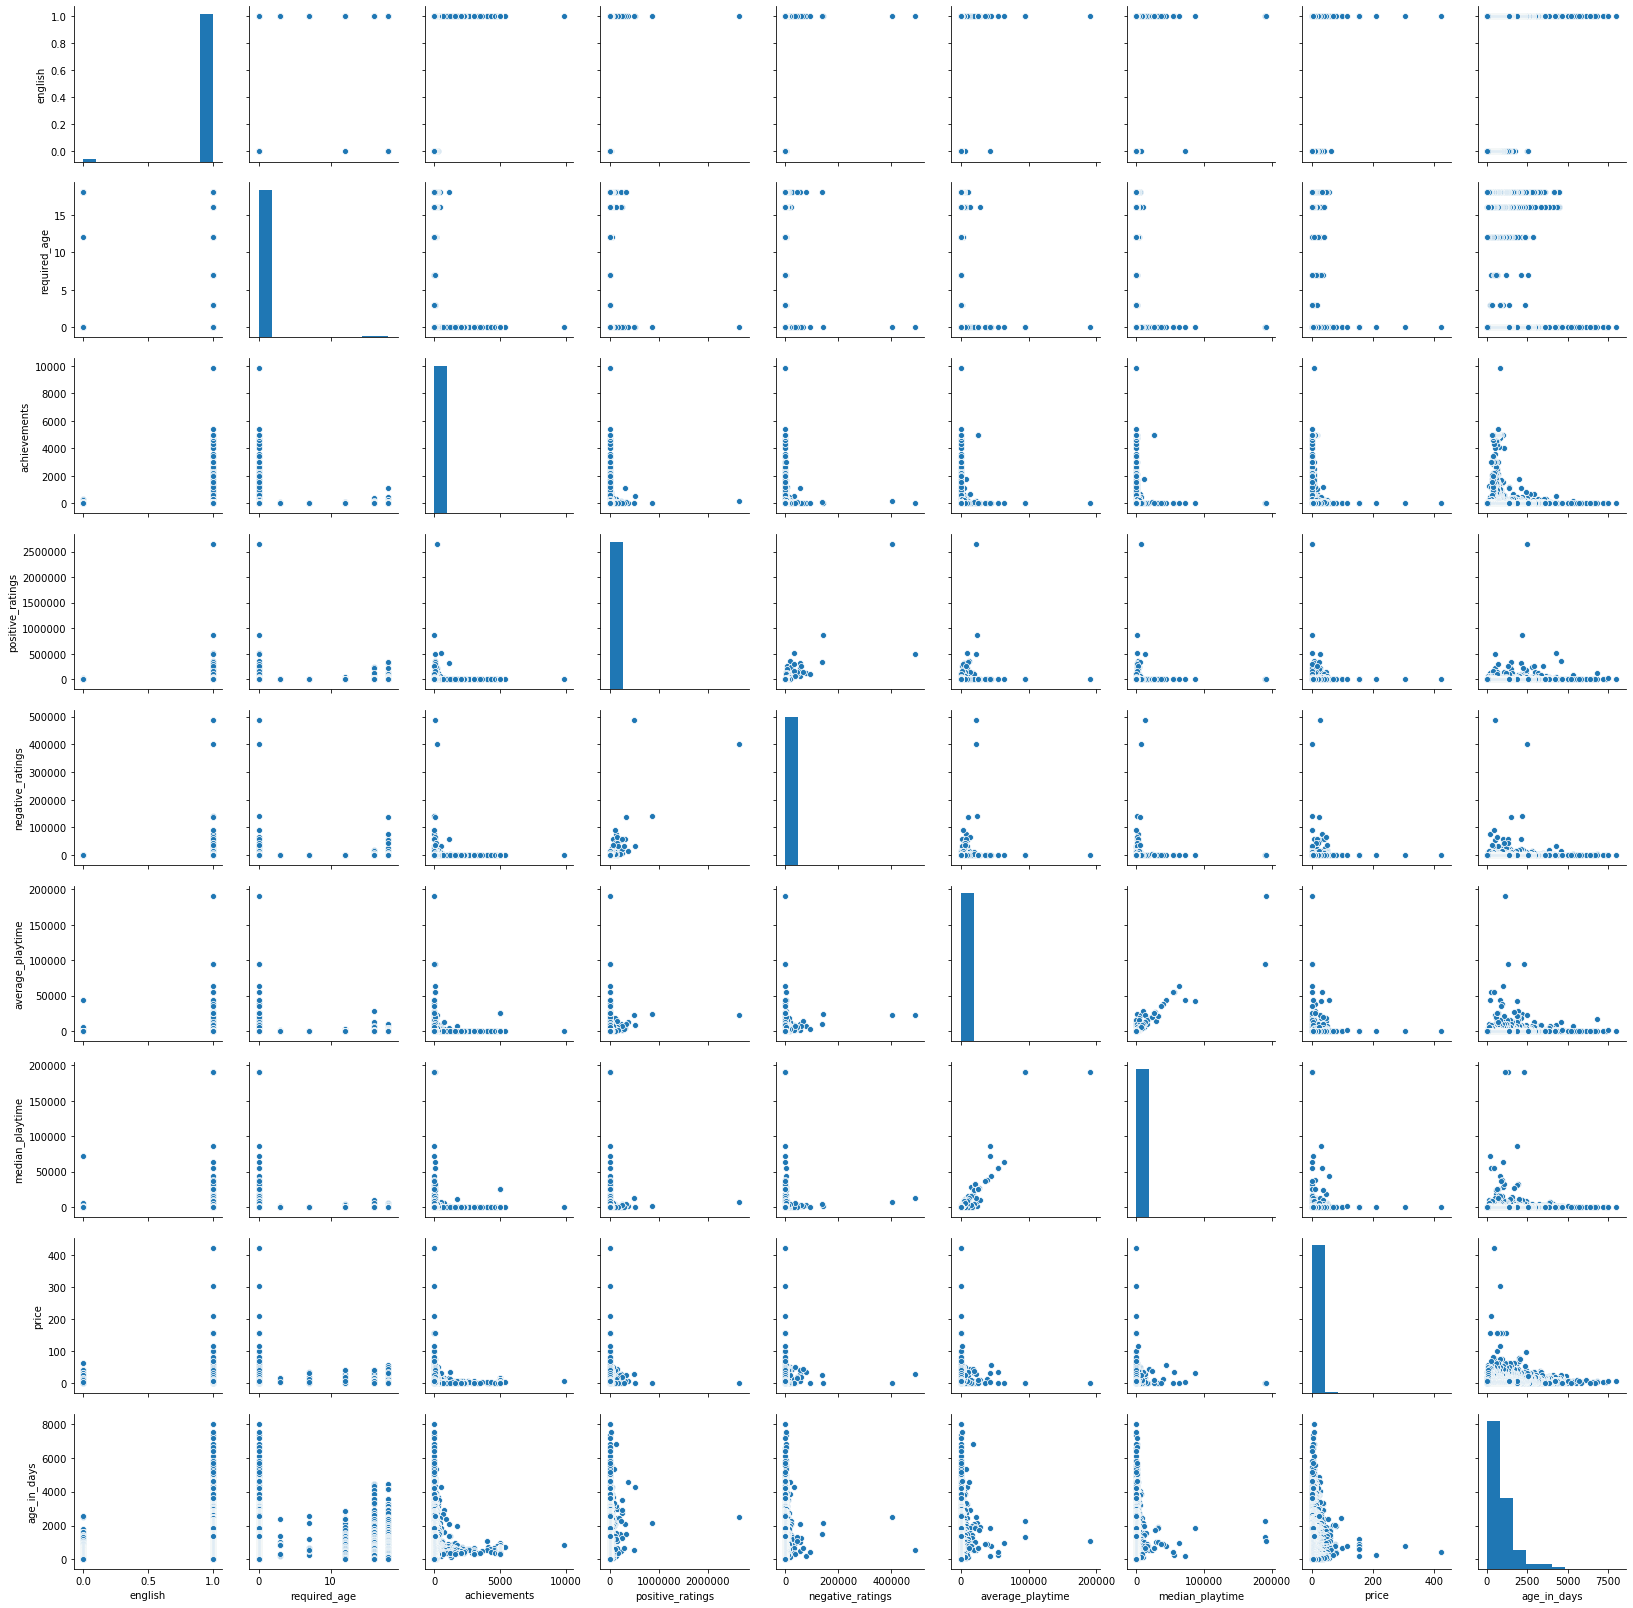

In [97]:
ax = sns.pairplot(df[features])

In [98]:
from sklearn.model_selection import train_test_split

# get train and test sets from the original dataframe
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

# get val by splitting train again
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print(X_train.shape, X_val.shape)

(21660, 13) (5415, 13)
(17328, 13) (4332, 13)


In [99]:
#Random Forest Classifier
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier

In [100]:
rfc_pipe = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
)

rfc_pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['developer', 'publisher', 'genres',
                                      'platforms'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'developer',
                                          'data_type': dtype('O'),
                                          'mapping': Choice of Games                       1
Super Mega Team                       2
Sports Interactive                    3
BatCat Games                          4
Rufoid AB                             5
                                  ...  
Amusitronix                       11982
Cartboard Games                   11983
Cold...
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini

In [101]:
rfc_pipe.score(X_val, y_val)

0.8114035087719298

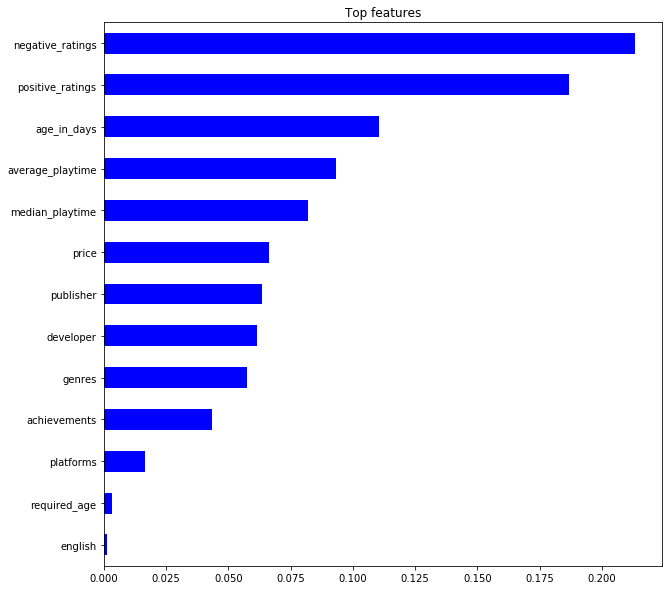

In [285]:
# Get feature importances
rf = rfc_pipe.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)

# Plot feature importances
%matplotlib inline
import matplotlib.pyplot as plt


plt.figure(figsize=(10,n/2))
plt.title(f'Top features')
importances.sort_values()[-n:].plot.barh(color='blue');

In [102]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

p_dist = {
    'randomforestclassifier__n_estimators': randint(50,500),
    'randomforestclassifier__max_depth':[5,10,15,20, None],
    'randomforestclassifier__max_features': uniform(0,1),
}

rfc_search = RandomizedSearchCV(
    rfc_pipe,
    param_distributions = p_dist,
    n_iter=10,
    cv=4,
    scoring='accuracy',
    verbose=10,
    return_train_score=True,
    n_jobs=-1
)

rfc_search.fit(X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done  14 out of  40 | elapsed:   17.1s remaining:   31.8s
[Parallel(n_jobs=-1)]: Done  19 out of  40 | elapsed:   17.9s remaining:   19.8s
[Parallel(n_jobs=-1)]: Done  24 out of  40 | elapsed:   19.8s remaining:   13.1s
[Parallel(n_jobs=-1)]: Done  29 out of  40 | elapsed:   27.1s remaining:   10.2s
[Parallel(n_jobs=-1)]: Done  34 out of  40 | elapsed:   28.1s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   29.2s finished


RandomizedSearchCV(cv=4, error_score='raise-deprecating',
                   estimator=Pipeline(memory=None,
                                      steps=[('ordinalencoder',
                                              OrdinalEncoder(cols=['developer',
                                                                   'publisher',
                                                                   'genres',
                                                                   'platforms'],
                                                             drop_invariant=False,
                                                             handle_missing='value',
                                                             handle_unknown='value',
                                                             mapping=[{'col': 'developer',
                                                                       'data_type': dtype('O'),
                                                                     

In [103]:
print('Best Hyperparameters:', rfc_search.best_params_)
print('Accuracy:', rfc_search.best_score_)

Best Hyperparameters: {'randomforestclassifier__max_depth': 20, 'randomforestclassifier__max_features': 0.8885830483617506, 'randomforestclassifier__n_estimators': 279}
Accuracy: 0.7992266851338874


In [104]:
###CODE EXAMPLE XGBoost Classifier###
from xgboost import XGBClassifier

xgb_pipe = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    XGBClassifier(n_estimators=100, random_state = 42, n_jobs = -1)
)

xgb_pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['developer', 'publisher', 'genres',
                                      'platforms'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'developer',
                                          'data_type': dtype('O'),
                                          'mapping': Choice of Games                       1
Super Mega Team                       2
Sports Interactive                    3
BatCat Games                          4
Rufoid AB                             5
                                  ...  
Amusitronix                       11982
Cartboard Games                   11983
Cold...
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsa

In [105]:
xgb_pipe.score(X_val, y_val)

0.793859649122807

In [106]:
#try a logistic regression model
from sklearn.linear_model import LogisticRegressionCV

LR_pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    LogisticRegressionCV(cv=5, n_jobs=-1, random_state = 42)
)
LR_pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['developer', 'publisher', 'genres',
                                      'platforms'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'developer',
                                          'data_type': dtype('O'),
                                          'mapping': Choice of Games                       1
Super Mega Team                       2
Sports Interactive                    3
BatCat Games                          4
Rufoid AB                             5
                                  ...  
Amusitronix                       11982
Cartboard Games                   11983
Cold...
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                         

In [107]:
LR_pipeline.score(X_val, y_val)

0.7354570637119113

In [108]:
#try logregression
#Try a linear model
# from xgboost import XGBRegressor

# xgbr_pipe = make_pipeline(
#     ce.OrdinalEncoder(),
#     SimpleImputer(),
#     XGBRegressor(n_estimators=100, n_jobs=-1),
# )

# xgbr_pipe.fit(X_train, y_train)

In [109]:
transformer = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median')
)

X_train_t = transformer.fit_transform(X_train)
X_val_t = transformer.fit_transform(X_val)

RFC_prep_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs = -1)
RFC_prep_model.fit(X_train_t, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [110]:
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    RFC_prep_model,
    scoring='accuracy',
    n_iter=5,
    random_state=42,
)

permuter.fit(X_val_t, y_val)

PermutationImportance(cv='prefit',
                      estimator=RandomForestClassifier(bootstrap=True,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       n_estimators=100,
                                                     

In [129]:
f_names = X_val.columns.tolist()
pd.Series(permuter.feature_importances_, f_names).sort_values(ascending=False)

negative_ratings    8.910434e-02
positive_ratings    7.576177e-02
age_in_days         3.873500e-02
average_playtime    3.162512e-02
price               2.991690e-02
median_playtime     2.834718e-02
genres              7.433056e-03
achievements        6.648199e-03
publisher           6.048015e-03
platforms           4.432133e-03
developer           2.677747e-03
english             5.078486e-04
required_age       -2.220446e-17
dtype: float64

In [286]:
feature_names = X_val.columns.tolist()

eli5.show_weights(
    permuter,
    top=None, # show permutation importances for all features
    feature_names=feature_names
)

In [130]:
df['required_age'].value_counts()

0     26479
18      308
16      192
12       73
7        12
3        11
Name: required_age, dtype: int64

In [112]:
X = df[features]
y = df[target]

encoder = ce.OrdinalEncoder()
X_encoded = encoder.fit_transform(X)
# y_encoded = encoder.fit_transform(y)

n_model = RandomForestClassifier(n_estimators = 100, random_state=42, n_jobs=-1)
n_model.fit(X_encoded, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

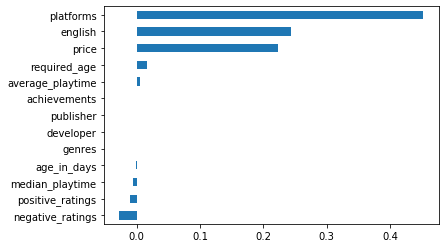

In [113]:
%matplotlib inline
encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
l_model = LogisticRegressionCV(cv=5, n_jobs=-1, random_state = 42)
l_model.fit(X_train_encoded, y_train)

coefficients = pd.Series(l_model.coef_[0], features)
coefficients.sort_values().plot.barh();

In [114]:
row = X_test.iloc[[0]]
row

developer     publisher  english  required_age  achievements  \
10506  Luke Cripps  Fellowplayer        1             0            14   

       positive_ratings  negative_ratings  average_playtime  median_playtime  \
10506                 6                 3                 0                0   

       price genres platforms  age_in_days  
10506   0.99  Indie   windows         1017

In [160]:
row2 = X_test.iloc[[3]]
row2

developer  publisher  english  required_age  achievements  \
1489  SkyGoblin  SkyGoblin        1             0             0   

      positive_ratings  negative_ratings  average_playtime  median_playtime  \
1489               902               129               303              327   

      price           genres          platforms  age_in_days  
1489   5.99  Adventure;Indie  windows;mac;linux         2334

In [115]:
processor = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median')
)
d_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

X_t_pro = processor.fit_transform(X_train)
X_v_pro = processor.transform(X_val)
eval_set =[(X_t_pro, y_train), (X_v_pro, y_val)]

d_model.fit(X_t_pro, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [297]:
row

developer     publisher  english  required_age  achievements  \
10506  Luke Cripps  Fellowplayer        1             0            14   

       positive_ratings  negative_ratings  average_playtime  median_playtime  \
10506                 6                 3                 0                0   

       price genres platforms  age_in_days  
10506   0.99  Indie   windows         1017

In [306]:
df[10506:10507]

appid           name release_date  english    developer     publisher  \
10506  514520  Sparky's Hunt   2016-08-18        1  Luke Cripps  Fellowplayer   

      platforms  required_age     categories genres steamspy_tags  \
10506   windows             0  Single-player  Indie  Indie;Horror   

       achievements  positive_ratings  negative_ratings  average_playtime  \
10506            14                 6                 3                 0   

       median_playtime  owners  price  age_in_days  
10506                0       0   0.99         1017

In [116]:
import shap

explainer = shap.TreeExplainer(d_model)
row_processed = processor.transform(row)
shap_v = explainer.shap_values(row_processed)
len(shap_v)

13

In [117]:
shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value[0],
    shap_values=shap_v[0],
    features=row,
    link='logit'
)

In [118]:
shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value[1],
    shap_values=shap_v[1],
    features=row,
    link='logit'
)

In [121]:
shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value[12],
    shap_values=shap_v[12],
    features=row,
    link='logit'
)

In [310]:
explainer = shap.TreeExplainer(d_model)
row_processed = processor.transform(row2)
shap_v = explainer.shap_values(row_processed)

In [311]:
row2

developer  publisher  english  required_age  achievements  \
1489  SkyGoblin  SkyGoblin        1             0             0   

      positive_ratings  negative_ratings  average_playtime  median_playtime  \
1489               902               129               303              327   

      price           genres          platforms  age_in_days  
1489   5.99  Adventure;Indie  windows;mac;linux         2334

In [312]:
df[1489:1490]

appid                           name release_date  english  developer  \
1489  220090  The Journey Down: Chapter One   2013-01-09        1  SkyGoblin   

      publisher          platforms  required_age  \
1489  SkyGoblin  windows;mac;linux             0   

                             categories           genres  \
1489  Single-player;Steam Trading Cards  Adventure;Indie   

                      steamspy_tags  achievements  positive_ratings  \
1489  Adventure;Point & Click;Indie             0               902   

      negative_ratings  average_playtime  median_playtime  owners  price  \
1489               129               303              327       4   5.99   

      age_in_days  
1489         2334

In [314]:
shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value[4],
    shap_values=shap_v[4],
    features=row,
    link='logit'
)

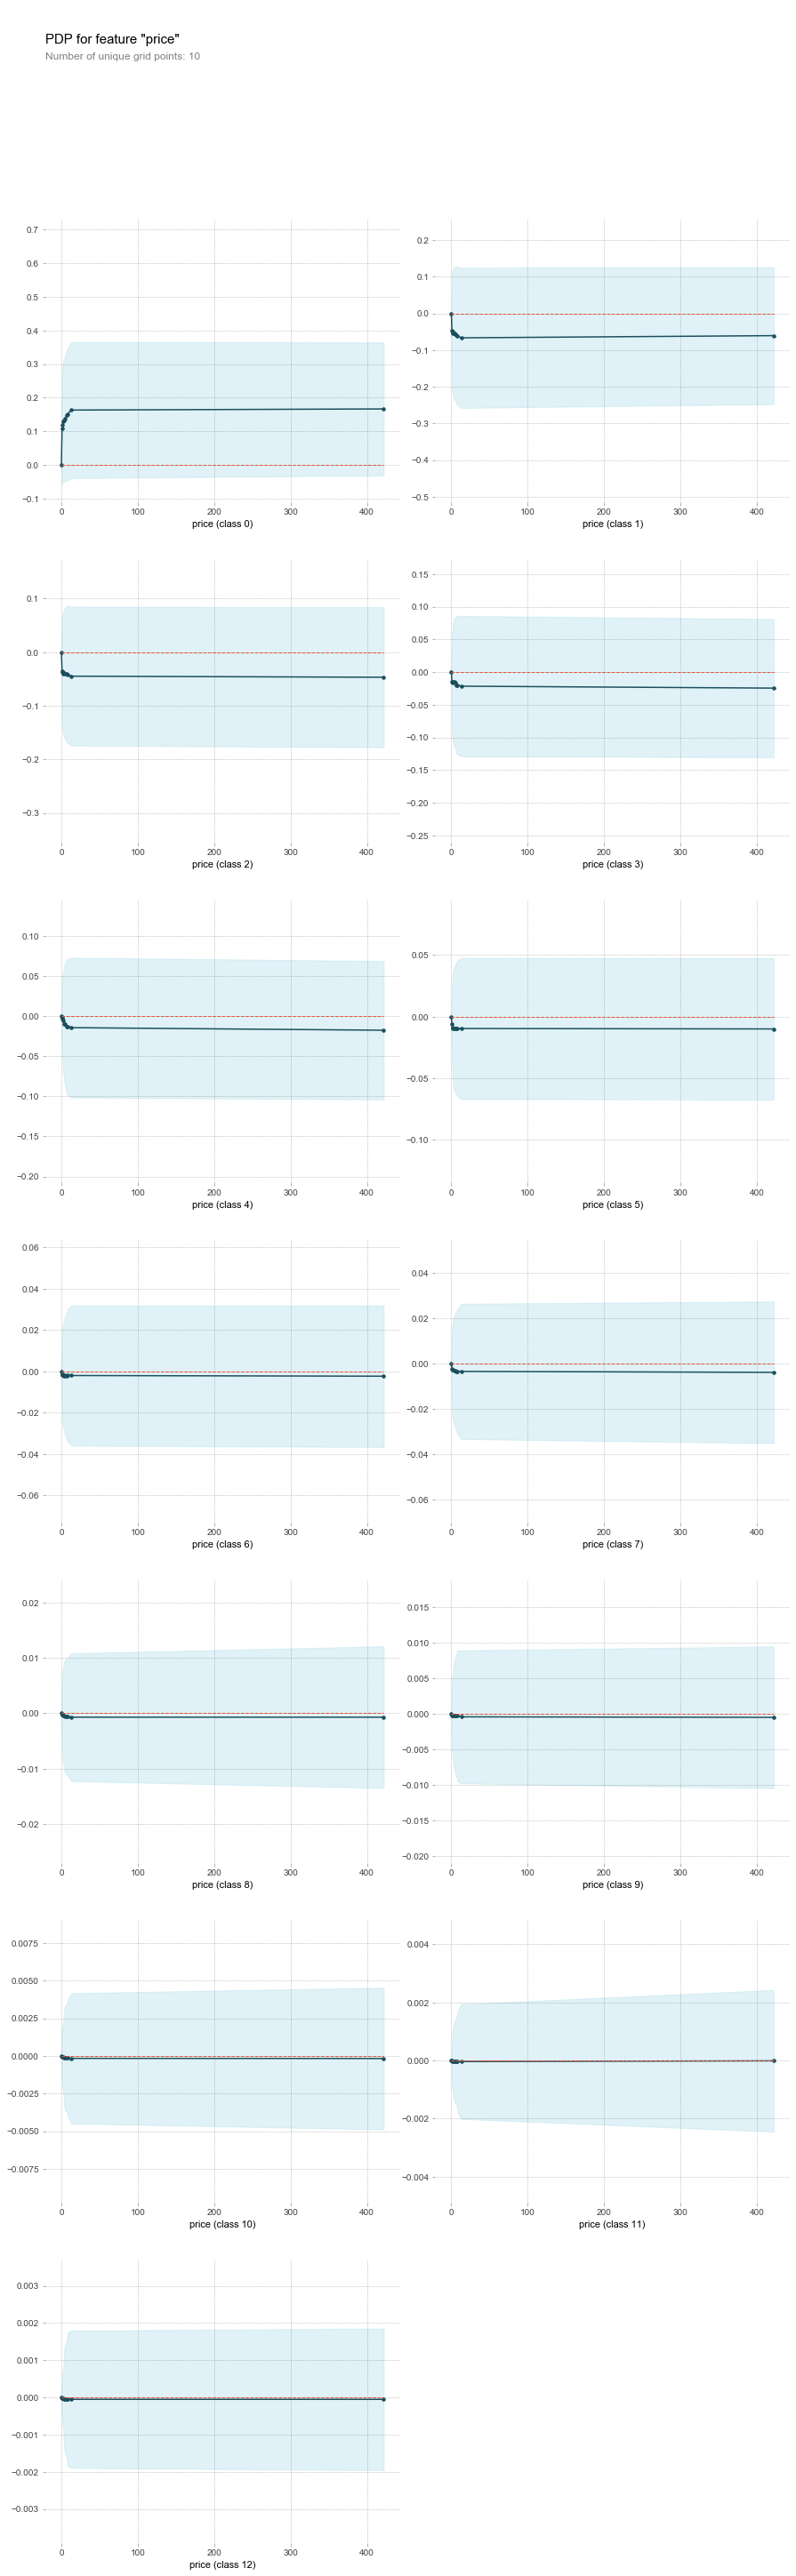

In [122]:
%matplotlib inline
import matplotlib.pyplot as plt
from pdpbox import pdp
pdp_feature='price'
pdp_dist = pdp.pdp_isolate(model=n_model, dataset=X_encoded, 
                           model_features=features, feature = pdp_feature)
pdp.pdp_plot(pdp_dist, pdp_feature);

In [123]:
encoder.mapping

[{'col': 'developer', 'mapping': Choice of Games                       1
  Super Mega Team                       2
  Sports Interactive                    3
  BatCat Games                          4
  Rufoid AB                             5
                                    ...  
  Amusitronix                       11982
  Cartboard Games                   11983
  Coldwood Interactive              11984
  Dudarev Alexandr Vladimirovich    11985
  NaN                                  -2
  Length: 11986, dtype: int64, 'data_type': dtype('O')},
 {'col': 'publisher', 'mapping': Choice of Games                             1
  Adult Swim Games                            2
  SEGA                                        3
  BatCat Games                                4
  Rufoid AB                                   5
                                          ...  
  Headbang Club;WhisperGames;Kakehashi    10103
  Amusitronix                             10104
  Cartboard Games                         10105
  Deklazon                                10106
  NaN                                        -2
  Length: 10107, dtype: int64, 'data_type': dtype('O')},
 {'col': 'genres',
  'mapping': Adventure;Indie;RPG                                                                                                                                                                        1
  Action;Indie                                                                                                                                                                               2
  Simulation;Sports                                                                                                                                                                          3
  Strategy                                                                                                                                                                                   4
  Casual;Indie;Simulation                                                                                                                                                                    5
                                                                                                                                                                                          ... 
  Adventure;Casual;Free to Play;Early Access                                                                                                                                              1238
  Casual;Free to Play;Indie;Accounting;Animation & Modeling;Audio Production;Design & Illustration;Education;Photo Editing;Software Training;Utilities;Video Production;Web Publishing    1239
  Violent;Gore;Casual;Free to Play;Indie;Strategy                                                                                                                                         1240
  Violent;Gore;Action;Indie;Massively Multiplayer                                                                                                                                         1241
  NaN                                                                                                                                                                                       -2
  Length: 1242, dtype: int64,
  'data_type': dtype('O')},
 {'col': 'platforms', 'mapping': windows;mac;linux    1
  windows;linux        2
  windows;mac          3
  windows              4
  mac                  5
  linux                6
  NaN                 -2
  dtype: int64, 'data_type': dtype('O')}]

In [124]:
def pdp_isolate_explain(X, y, feature):
    import category_encoders as ce
    from sklearn.pipeline import make_pipeline
    from sklearn.impute   import SimpleImputer
    from sklearn.ensemble import RandomForestClassifier
    from pdpbox.pdp       import pdp_isolate, pdp_plot
    # Encode, impute as needed
    X_encoded   = ce.OrdinalEncoder().fit_transform(X)
    X_processed = SimpleImputer().fit_transform(X_encoded)
    # Pick a model and fit the data
    pdp_model = RandomForestClassifier(n_estimators = 200
                                      ,n_jobs       = -1
                                      ,random_state = 6
                                      )
    pdp_model.fit(X_processed
                 ,y
                 )
    # The actual plotting
    pdp_isolate = pdp_isolate(model          = pdp_model
                             ,dataset        = X_encoded
                             ,model_features = X_encoded.columns
                             ,feature        = feature
                             )
    pdp_plot(pdp_isolate
            ,feature_name = feature
            ,plot_lines   = True
            ,frac_to_plot = 100
            )

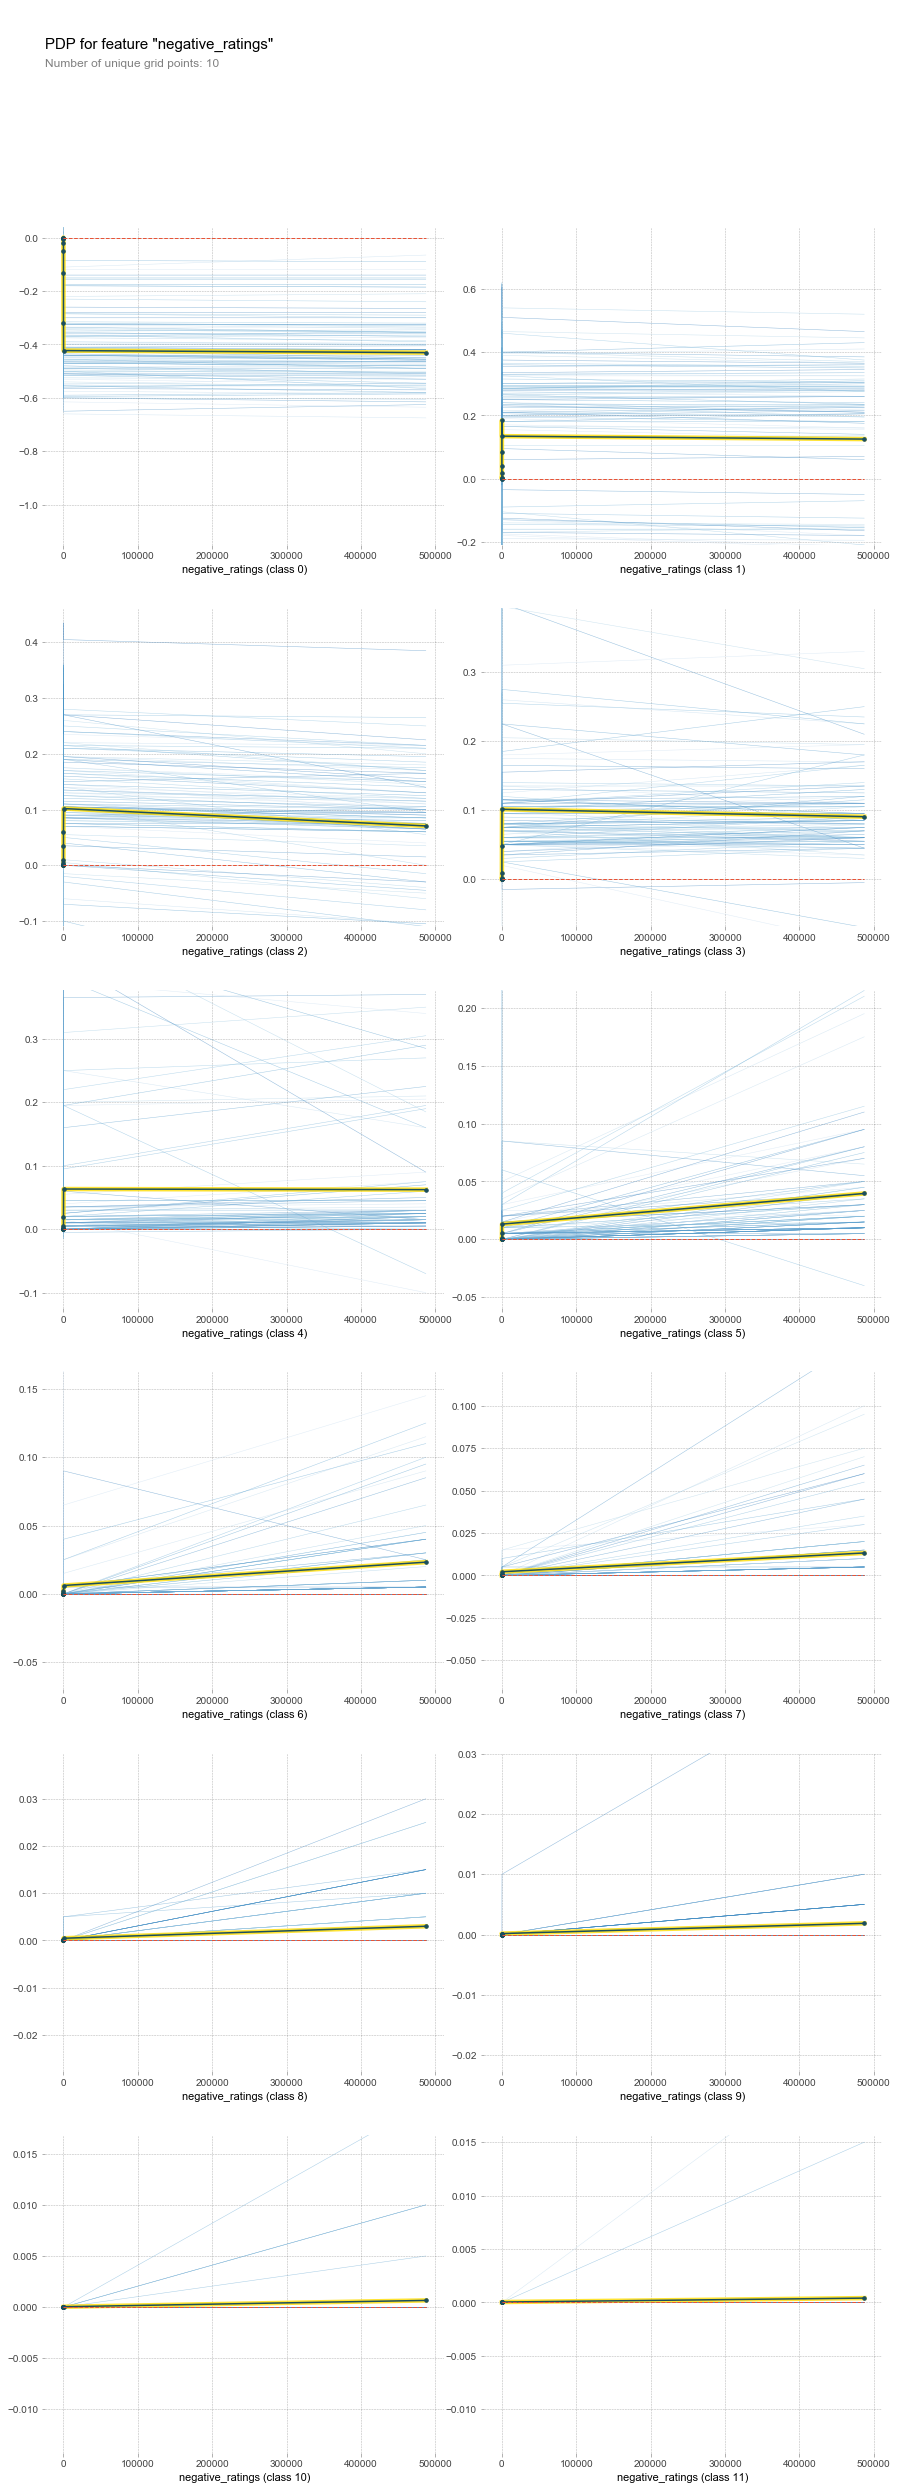

In [125]:
pdp_isolate_explain(X_test, y_test, 'negative_ratings')

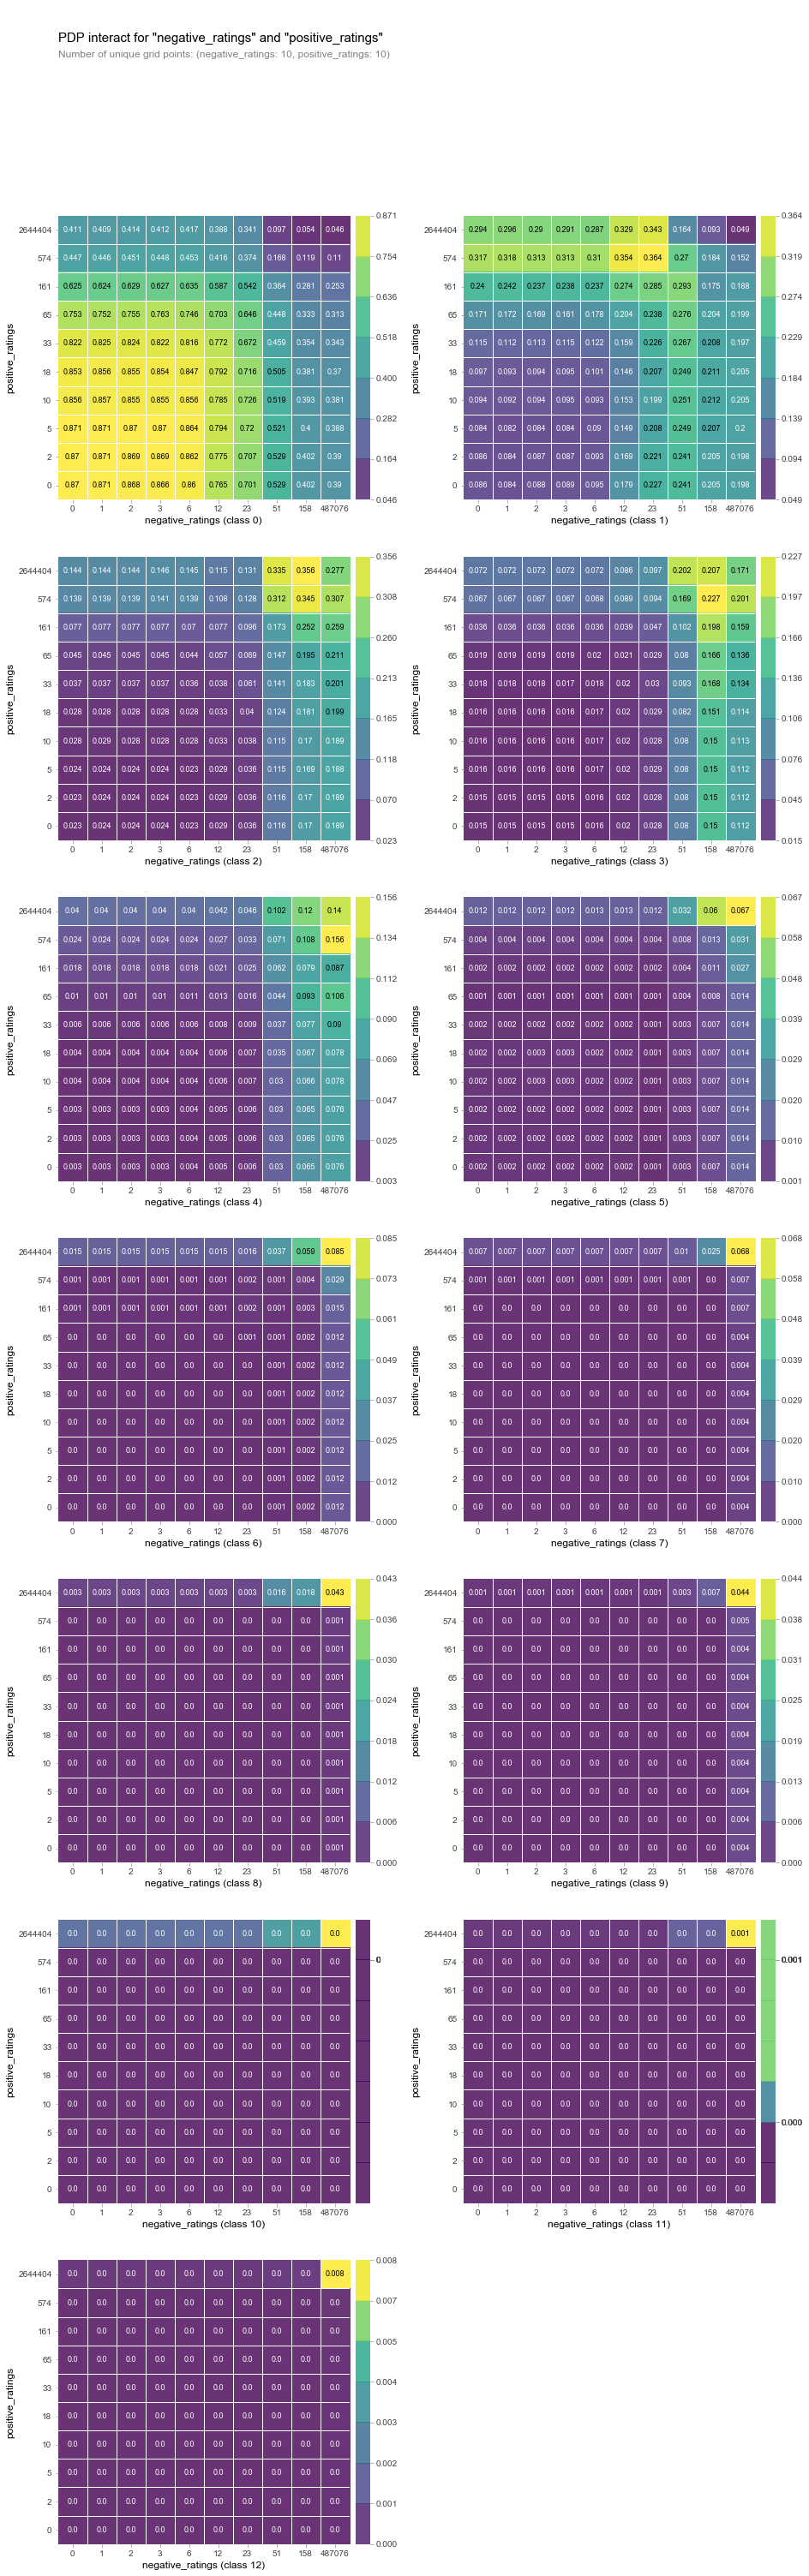

In [126]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot
features = ['negative_ratings', 'positive_ratings']

interaction = pdp_interact(
    model=rfc_pipe, 
    dataset=X_encoded, 
    model_features=X_encoded.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features);

In [139]:
import plotly.express as px
px.scatter(df, x='owners', y='negative_ratings', trendline='ols')

In [135]:
px.scatter(df, x='owners', y='positive_ratings')

IndexError: list index out of range

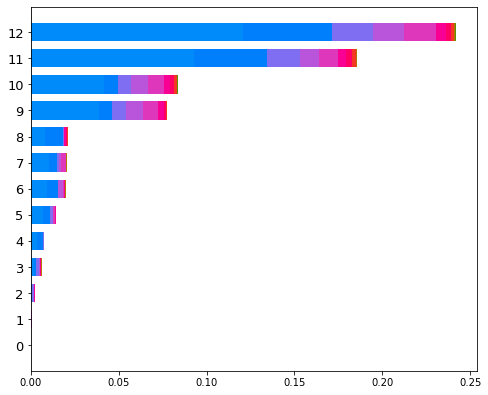

In [138]:
shap.summary_plot(shap_v, features=features, feature_names=None,
                  max_display=None, plot_type=None, color=None, 
                  axis_color='#333333', title=None, alpha=1, show=True, 
                  sort=True, color_bar=True, plot_size='auto', 
                  layered_violin_max_num_bins=20, class_names=None, 
                  color_bar_label='Feature value', auto_size_plot=None)

In [291]:
y_pred = rfc_pipe.predict(X_val)

In [294]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [288]:
from sklearn.utils.multiclass import unique_labels
unique_labels(y_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

  Found existing installation: matplotlib 3.1.1
    Uninstalling matplotlib-3.1.1:


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\users\\eneph\\anaconda3\\envs\\unit2\\lib\\site-packages\\matplotlib\\backends\\_backend_agg.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



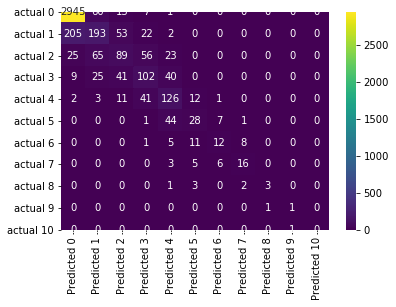

In [296]:
!pip install matplotlib==3.1.0
from sklearn.metrics import confusion_matrix

def plot_conf_mat(y_true, y_pred):
    labels = unique_labels(y_true)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), columns=columns, index=index)
    return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')

plot_conf_mat(y_val, y_pred)